<a href="https://colab.research.google.com/github/indrap23/PJJDA/blob/main/Clustering_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Data

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

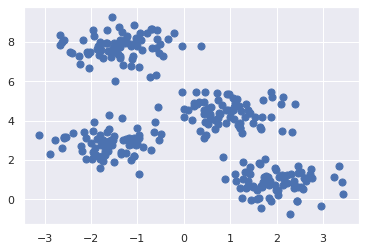

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

# 1. Partitional Clustering

## K Means Clustering

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


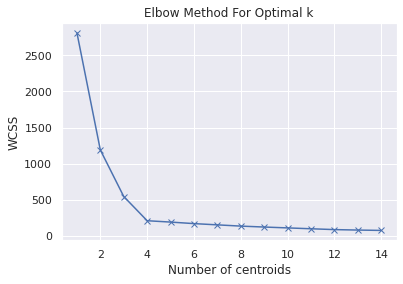

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from kneed import KneeLocator

In [ ]:
kl = KneeLocator(range(1, 15), wcss, curve="convex", direction="decreasing")
kl.elbow

4

In [ ]:
from sklearn.metrics import silhouette_score
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
dim=pd.DataFrame(X, columns=['dim-0','dim-1'])

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(dim)
  score = silhouette_score(dim, kmeans.labels_)
  silhouette_coefficients.append(score)

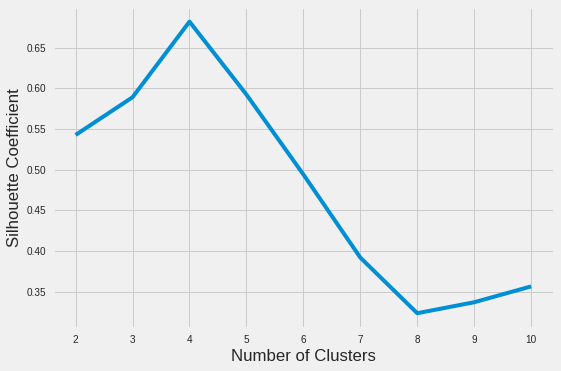

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
def silhouettePlot(range_, data):
    '''
    we will use this function to plot a silhouette plot that helps us to evaluate the cohesion in clusters (k-means only)
    '''
    half_length = int(len(range_)/2)
    range_list = list(range_)
    fig, ax = plt.subplots(half_length, 2, figsize=(15,8))
    for _ in range_:
        kmeans = KMeans(n_clusters=_, random_state=42)
        q, mod = divmod(_ - range_list[0], 2)
        sv = SilhouetteVisualizer(kmeans, colors="yellowbrick", ax=ax[q][mod])
        ax[q][mod].set_title("Silhouette Plot with n={} Cluster".format(_))
        sv.fit(data)
    fig.tight_layout()
    fig.show()
    fig.savefig("silhouette_plot.png")

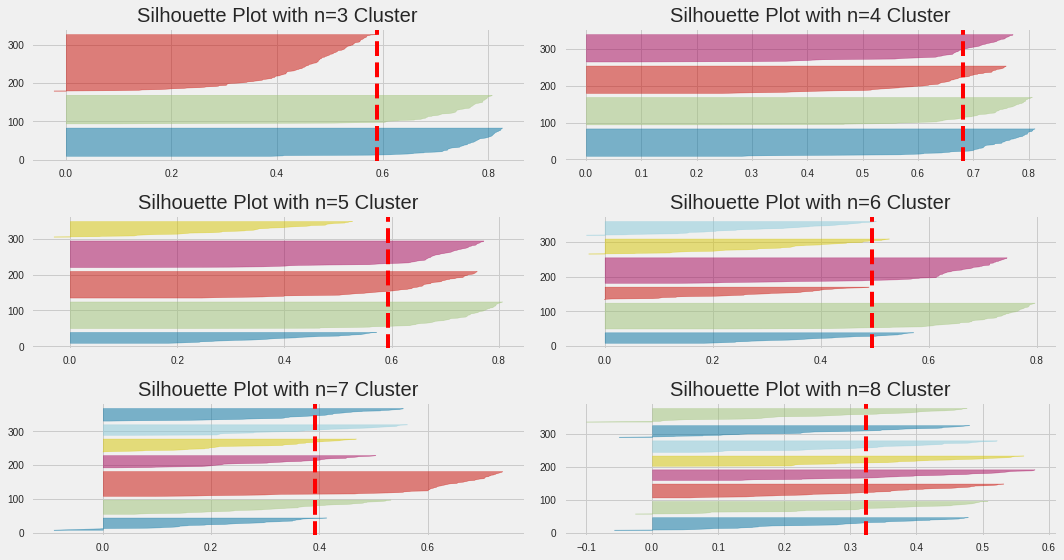

In [ ]:
silhouettePlot(range(3,9), dim)

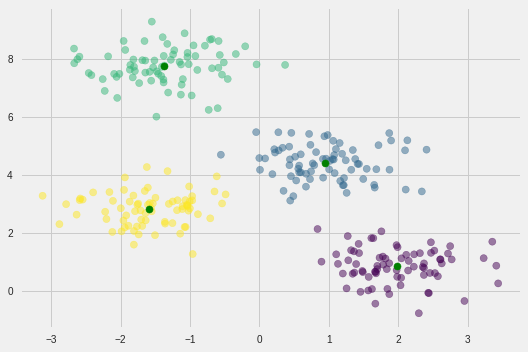

In [ ]:
#build our algorithm with k=4, train it on data and make predictions
kmeans = KMeans(n_clusters=4, random_state=0).fit(dim)
y_kmeans = kmeans.predict(dim)
#plotting the results
plt.scatter(dim['dim-0'], dim['dim-1'], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=50)

# 2. Hierarchical Clustering

## Agglomerative

In [ ]:
from sklearn.cluster import AgglomerativeClustering


In [ ]:
clustering = AgglomerativeClustering(n_clusters=4).fit(X)

In [ ]:
clustering.labels_

array([2, 0, 1, 0, 2, 2, 3, 1, 0, 0, 3, 0, 1, 0, 2, 1, 1, 2, 3, 3, 2, 2,
       1, 3, 3, 1, 2, 1, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 1, 3, 1, 1,
       3, 3, 0, 3, 0, 2, 3, 2, 0, 2, 2, 3, 0, 3, 0, 2, 0, 1, 0, 3, 3, 3,
       0, 2, 0, 3, 1, 3, 0, 3, 3, 0, 3, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1,
       0, 0, 1, 2, 0, 3, 3, 1, 2, 2, 1, 3, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1,
       3, 3, 2, 0, 2, 1, 0, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 0, 3,
       3, 2, 0, 3, 3, 0, 1, 0, 0, 3, 1, 3, 1, 3, 0, 1, 0, 0, 0, 1, 0, 1,
       2, 3, 0, 3, 2, 1, 0, 1, 1, 2, 1, 3, 3, 1, 2, 1, 1, 0, 2, 1, 3, 0,
       2, 2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 1, 2, 0, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 0, 1, 3, 2, 3, 1, 0, 3, 0, 1, 0, 1, 3, 1, 1, 0, 3, 3, 2, 2, 1,
       0, 2, 2, 3, 2, 3, 1, 0, 0, 1, 1, 0, 1, 2, 3, 1, 2, 3, 0, 3, 2, 1,
       2, 0, 0, 0, 0, 3, 3, 0, 1, 3, 2, 1, 3, 3, 3, 2, 2, 0, 1, 1, 3, 2,
       0, 3, 1, 0, 1, 2, 2, 3, 3, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 3, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 3])

In [ ]:
from scipy.cluster.hierarchy import dendrogram

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

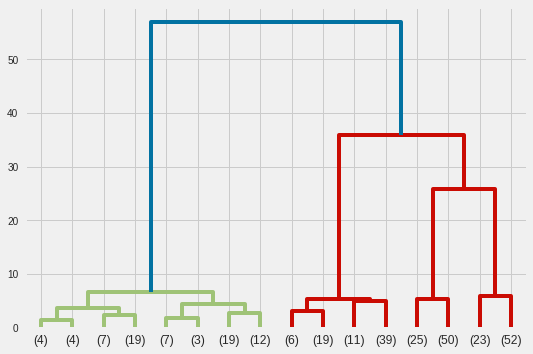

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(X)
plot_dendrogram(model, truncate_mode="level", p=3)

## Divisive

In [ ]:
from scipy.cluster import hierarchy

In [ ]:
clusters = hierarchy.linkage(X, method="single")
clusters[:5]

array([[9.70000000e+01, 2.81000000e+02, 6.47163353e-03, 2.00000000e+00],
       [3.90000000e+01, 1.26000000e+02, 9.75014192e-03, 2.00000000e+00],
       [1.69000000e+02, 2.00000000e+02, 1.23490606e-02, 2.00000000e+00],
       [1.06000000e+02, 1.33000000e+02, 1.26424175e-02, 2.00000000e+00],
       [6.30000000e+01, 1.41000000e+02, 1.43068081e-02, 2.00000000e+00]])

In [ ]:
def ploting_dendrogram(clusters):
    plt.figure(figsize=(20,6))
    dendrogram = hierarchy.dendrogram(clusters, orientation="top",leaf_font_size=9, leaf_rotation=360)
    plt.ylabel('Euclidean Distance');



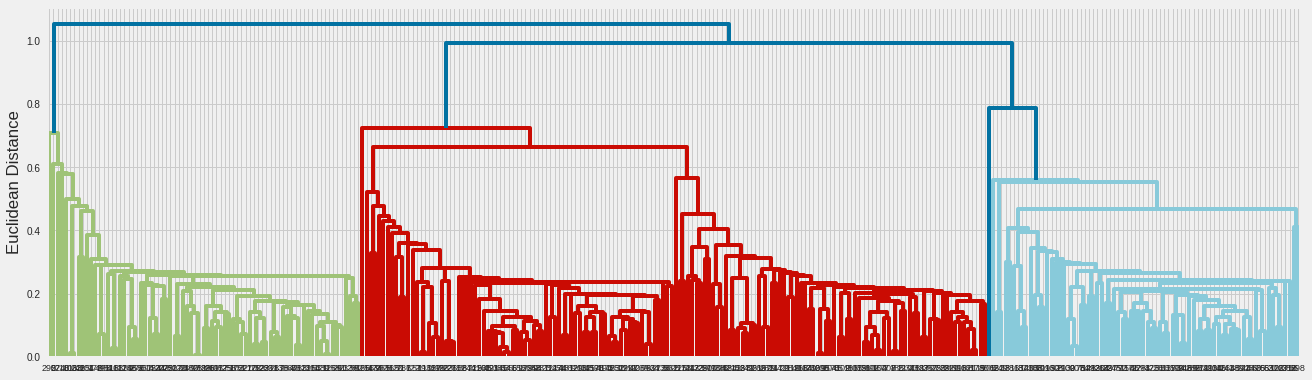

In [ ]:
ploting_dendrogram(clusters)

# 3. Density Based Clustering

## DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([-1,  0, -1,  0, -1, -1, -1,  2, -1, -1,  1, -1,  2, -1, -1,  2,  2,
        3,  1, -1,  3,  3, -1,  1,  1, -1,  3, -1, -1,  2, -1,  0, -1, -1,
        0, -1,  0, -1,  1,  3,  2,  1, -1, -1,  1,  1,  0,  1,  0, -1, -1,
        3,  0,  3, -1,  1, -1, -1,  0,  3, -1,  2, -1,  1,  1,  1, -1,  3,
       -1,  1, -1, -1,  0,  1, -1, -1,  1,  2,  3,  0, -1,  2, -1,  3, -1,
       -1,  3,  4, -1,  0,  2,  3, -1,  1,  1,  2, -1,  3, -1, -1, -1, -1,
       -1,  3,  2,  3, -1,  2, -1, -1, -1, -1,  3, -1,  3, -1,  0, -1, -1,
       -1, -1,  3, -1,  3, -1,  3,  3, -1, -1,  1, -1,  1,  1, -1,  0, -1,
       -1,  0, -1, -1, -1,  1, -1, -1, -1,  1,  0, -1,  0,  0,  0,  2, -1,
        4, -1,  1,  0,  1,  3,  2, -1,  2,  2, -1,  2, -1, -1,  4, -1, -1,
        2,  0,  3, -1, -1,  0, -1,  3,  2,  1,  3, -1,  1,  1,  4,  2, -1,
        2,  3,  0, -1,  1,  2,  2,  1, -1, -1, -1,  1,  0, -1,  1, -1,  1,
       -1, -1,  1, -1,  2, -1,  2,  1,  4, -1,  0, -1,  1,  3, -1,  2,  0,
        3,  3, -1, -1, -1

In [ ]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False,  True, False,  True, False, False, False, False, False,
       False,  True, False,  True, False, False,  True,  True, False,
        True, False,  True, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False,  True, False, False,  True,
        True, False,  True,  True, False, False, False, False,  True,
       False,  True, False, False,  True, False, False,  True, False,
        True, False,  True, False,  True, False,  True, False, False,
        True,  True, False, False,  True,  True,  True, False, False,
        True, False, False, False, False,  True, False, False,  True,
        True,  True, False,  True,  True, False, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False,  True, False, False, False,  True,
        True, False,

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

5

In [ ]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4}

In [ ]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.95686275, 0.42745098, 0.2627451 , 1.        ],
       [0.99607843, 0.87843137, 0.54509804, 1.        ],
       [0.90196078, 0.96078431, 0.59607843, 1.        ],
       [0.4       , 0.76078431, 0.64705882, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

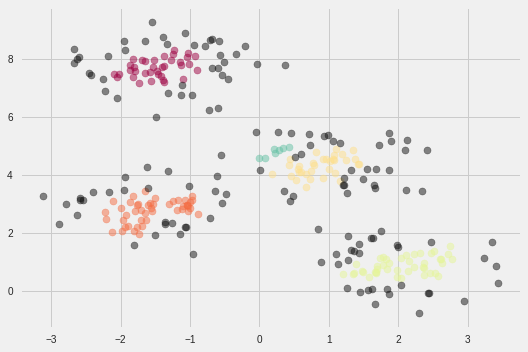

In [ ]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

## OPTICS

In [ ]:
from sklearn.cluster import OPTICS

In [ ]:
optics = OPTICS(min_samples=10).fit(X)

In [ ]:
optics.labels_

array([-1,  4, -1,  4, -1, -1, -1,  2, -1, -1, -1, -1,  2, -1, -1, -1,  2,
       -1,  3, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  4, -1, -1,
        4, -1,  4, -1, -1,  0, -1, -1, -1, -1, -1,  3,  4, -1,  4, -1, -1,
       -1, -1,  0, -1,  3, -1, -1,  4,  0, -1,  1, -1,  3, -1,  3, -1, -1,
       -1, -1, -1, -1,  4, -1, -1, -1, -1,  2,  0,  4, -1,  1, -1,  0, -1,
       -1, -1, -1, -1,  4,  1,  0, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  2, -1, -1,  2, -1, -1, -1, -1,  0, -1,  0, -1,  4, -1, -1,
       -1, -1,  0, -1,  0, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1,  4, -1,
       -1,  4, -1, -1, -1,  3, -1, -1, -1, -1,  4, -1,  4,  4,  4,  2, -1,
       -1, -1,  3,  4, -1,  0,  2, -1,  1,  1, -1,  2, -1, -1, -1, -1, -1,
       -1,  4,  0, -1, -1,  4, -1, -1,  1,  3, -1, -1, -1, -1, -1,  2, -1,
        1, -1,  4, -1,  3,  2,  1, -1, -1, -1, -1, -1,  4, -1,  3, -1, -1,
       -1, -1, -1, -1,  2, -1,  2, -1, -1, -1,  4, -1,  3,  0, -1,  1,  4,
       -1,  0, -1, -1, -1

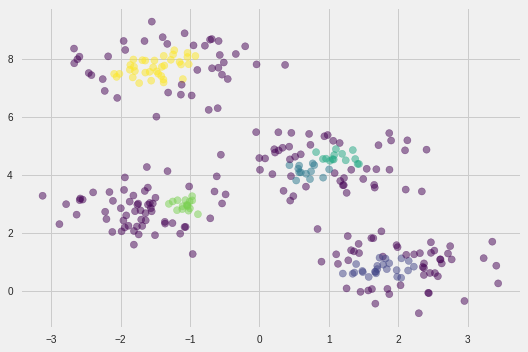

In [ ]:
y_optics = optics.fit_predict(dim)
#plotting the results
plt.scatter(dim['dim-0'], dim['dim-1'], c=y_optics, s=50, alpha=0.5,cmap='viridis')